
Gradient Boosting Evaluation Metrics:
Accuracy: 0.8011
Precision: 0.7582
Recall: 0.7572
F1 Score: 0.7577

SVM Evaluation Metrics:
Accuracy: 0.7720
Precision: 0.7790
Recall: 0.6211
F1 Score: 0.6911


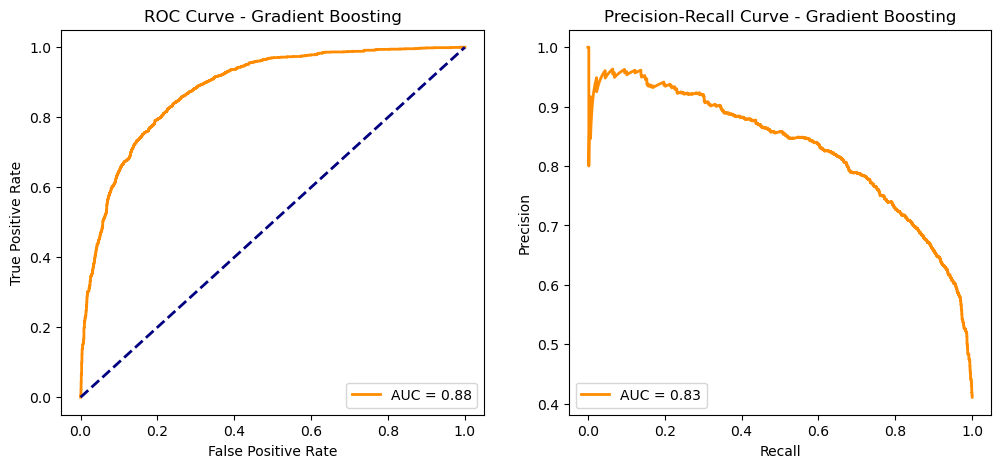

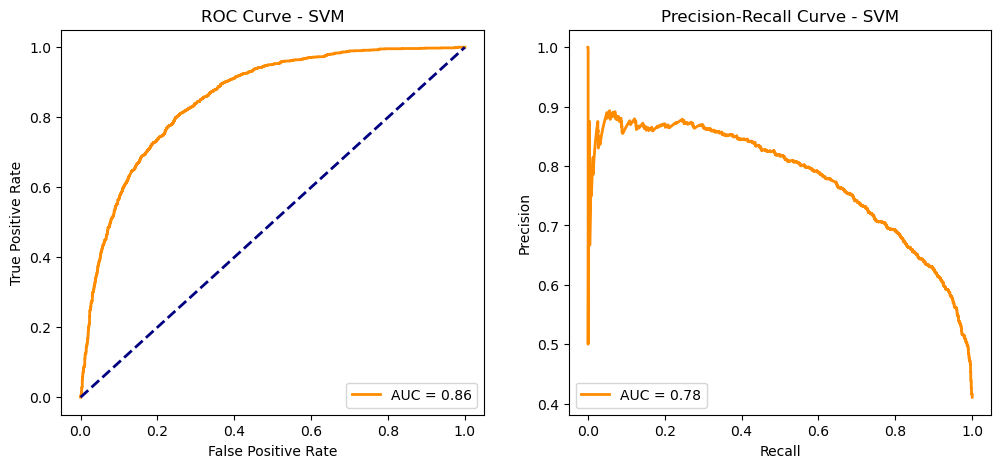

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Example data generation (replace this with your actual dataset)
# X: (19489, 48, 52), y: (19752,)
X = np.load('../data/6hrs/X_6hr.npy')
y = np.load('../data/6hrs/y_6hr.npy')



# Step 1: Feature Engineering - Calculate mean, std, max, min for each feature over the time steps
X_mean = np.mean(X, axis=1)
X_std = np.std(X, axis=1)
X_max = np.max(X, axis=1)
X_min = np.min(X, axis=1)

# Concatenate all summary features into one feature vector per sample
X_summary = np.concatenate([X_mean, X_std, X_max, X_min], axis=1)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_summary, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Prediction
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
y_pred_gb_proba = gb_clf.predict_proba(X_test)[:, 1]

# Support Vector Machine
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_pred_svm_proba = svm_clf.predict_proba(X_test)[:, 1]

# Step 4: Evaluation Metrics
def print_metrics(y_test, y_pred, model_name):
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

print_metrics(y_test, y_pred_gb, "Gradient Boosting")
print_metrics(y_test, y_pred_svm, "SVM")

# Step 5: Plot AUC-ROC and AUPRC for each model
def plot_roc_pr(y_test, y_pred_proba, model_name):
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    # Plotting
    plt.figure(figsize=(12, 5))

    # ROC Plot
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")

    # Precision-Recall Plot
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color="darkorange", lw=2, label=f"AUC = {pr_auc:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend(loc="lower left")

    plt.show()

# Plot for Gradient Boosting
plot_roc_pr(y_test, y_pred_gb_proba, "Gradient Boosting")

# Plot for SVM
plot_roc_pr(y_test, y_pred_svm_proba, "SVM")


In [ ]:

np.save('../Scores/validation_loss/TG6-VL.npy', np.array(history.history['val_loss']))
np.save('../Scores/validation_accuracy/TG6-VA.npy', np.array(history.history['val_accuracy']))
np.save('../Scores/training_accuracy/TG6-TA.npy', np.array(history.history['accuracy']))
np.save('../Scores/training_loss/TG6-TL.npy', np.array(history.history['loss']))


np.save('../Scores/ROC-PRC/TG6-y_test.npy', np.array(y_test))
np.save('../Scores/ROC-PRC/TG6-y_pred.npy', np.array(y_pred))
np.save('../Scores/ROC-PRC/TG6-y_pred_proba.npy', np.array(y_pred_proba))
